Running BLAST as a Shell Command
==============================

Use the following shell command to run BLAST as a shell command, outside of Python.  (A shell command in Jupyter always begins with an exclamation point (!), and follows a different syntax than Python commands).  Run the command as usual by clicking on the code box below, then clicking the **Run** button above.  

* Note that any command may take some time to finish.  While it is still running, an asterisk will be shown to the left of the code box ``In [*]``, and the circle next to **Python** in the upper-right of the window will be solid.  When it finishes, the asterisk will change to a number e.g. ``In [1]``, and the circle will become hollow. **NOTE**: always wait for your running code to finish before proceeding to any other code.

* Note that a shell command consists of a command name followed by a set of *arguments* each preceded by an *option flag* beginning with a dash.  The ``-task blastn`` option tells it to use the blastn variant of BLAST.   As is typical, you can get a helpful list of possible options by running ``blastn -help``.

* Note that in some cases you need to specify WHERE a particular resource is stored on the computer's file system.  You do this by specifying its "path".  In this case we are keeping most of our files in the `/var/local/C100` directory.

* This command tests running BLAST on the FASTA sequence format test file ``in.txt`` in the `/var/local/C100` directory (if you view that file, you'll see it just gives a sequence name on the first line, and a short DNA sequence on the second line).  

Run BLAST to search the E. coli genome NC_000913 for this query sequence as follows:

In [1]:
!/var/local/C100/ncbi-blast-2.10.0+/bin/blastn -db /var/local/C100/NC_000913.fna -task blastn </var/local/C100/in.txt

BLASTN 2.10.0+


Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of
protein database search programs", Nucleic Acids Res. 25:3389-3402.



Database: NC_000913.fna
           1 sequences; 4,639,675 total letters



Query= myseq

Length=30
                                                                      Score        E
Sequences producing significant alignments:                          (Bits)     Value

gi|49175990|ref|NC_000913.2| Escherichia coli str. K-12 substr. M...  55.4       1e-09


>gi|49175990|ref|NC_000913.2| Escherichia coli str. K-12 substr. 
MG1655 chromosome, complete genome
Length=4639675

 Score = 55.4 bits (60),  Expect = 1e-09
 Identities = 30/30 (100%), Gaps = 0/30 (0%)
 Strand=Plus/Plus

Query  1    GGACGCAACGGTTCCGACTACTCTGCTGCG  30
            ||||||||||||||||||||||||||||||
Sbjct  943  GGACGCAACGGTTCCGACTACTCTGCTGCG  972



* The ``-db`` option specifies the sequence database to search;

* the ``-task`` option specifies what variant of the BLAST program to run.  Note that there are many variants of BLAST for different kinds of sequence comparisons, e.g. ``blastn`` for nucleotide sequence comparisons, ``blastp`` for protein sequence comparisons.  Here we performed a nucleotide sequence search.

* ``<in.txt`` forces the program to read its input (query sequence) from the file ``in.txt``.

**QUESTION**: How many
different hits did BLAST find?  Based on the expectation
(E) values, which of the hits if any appear to be real
homologies?  Does percent-identity alone appear to be
a reliable indicator of real homology?


**ANSWER**: The amount of different hits BLAST found was 4. Based on the expectation (E) values, the first hit (e-value of 1e-09) may be real homologies. Percent identity alone is not a reliable indicator of real homology, as sometimes hits do and do not occur simply due to chance.

Automating BLAST Searches Using Python
=========================================

For analyses where you need to run BLAST many times, it is important to know how to run the software using automation.  The simplest way to do this is with Python.  Python makes it easy to run programs and process their input / output automatically.  For example, say we wanted to obtain the score and E-value for the top hit from a BLAST search for any nucleotide sequence.  We'll do this using two Python packages ``subprocess`` (for running other programs from Python) and ``re`` (for searching text for so-called "Regular Expressions").  Within the same directory, start Python, and then import these packages:

In [2]:
import re, subprocess

Next we write our BLAST command as a list of strings:

In [3]:
cmd = ['/var/local/C100/ncbi-blast-2.10.0+/bin/blastn', '-db', '/var/local/C100/NC_000913.fna', '-task', 'blastn']

Note that we didn't have to tell it input and output files.
Python provides a way of communcating directly with subprocesses
called *pipes*.  We start our subprocess, indicating that both
its input and output will use pipes (we could have passed files instead):

In [4]:
p = subprocess.Popen(cmd, stdin=subprocess.PIPE, stdout=subprocess.PIPE)

Next we just create our FASTA input:

In [5]:
seq = 'ggacgcaacggttccgactactctgctgcg'
fasta = '>myseq\n' + seq + '\n'

Note that ``\n`` is the *newline* character, equivalent
to typing a carriage-return.  The FASTA format requires a *sequence name*
on the first line, and then the sequence itself starting on the second line.

Finally we just read BLAST's output over the pipe:

In [6]:
stdout, stderr = p.communicate(bytes(fasta, 'utf8'))
blastout = str(stdout, encoding='utf8')

Note that when Python communicates with external programs like BLAST, we must specify what character encoding the external program reads and writes its data.  Here we use the standard ``utf8`` encoding.  We also provide conversions to deal with the fact the external program reads and writes ``bytes``, whereas in Python we use ``str`` (a text string) to work with text data.

You can verify your results by printing ``blastout``, it will 
look like your original BLAST results.
(``stderr`` reports any error messages from the program; in this
case we are just ignoring it).

In [7]:
print(blastout)

BLASTN 2.10.0+


Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of
protein database search programs", Nucleic Acids Res. 25:3389-3402.



Database: NC_000913.fna
           1 sequences; 4,639,675 total letters



Query= myseq

Length=30
                                                                      Score        E
Sequences producing significant alignments:                          (Bits)     Value

gi|49175990|ref|NC_000913.2| Escherichia coli str. K-12 substr. M...  55.4       1e-09


>gi|49175990|ref|NC_000913.2| Escherichia coli str. K-12 substr. 
MG1655 chromosome, complete genome
Length=4639675

 Score = 55.4 bits (60),  Expect = 1e-09
 Identities = 30/30 (100%), Gaps = 0/30 (0%)
 Strand=Plus/Plus

Query  1    GGACGCAACGGTTCCGACTACTCTGCTGCG  30
            ||||||||||||||||||||||||||||||
Sbjct  943  GGACGCAACGGTTCCGACTACTCTGCTGCG  972



Parsing BLAST output using Regular Expressions
=============================================

Now we can use *regular expressions* to extract the top score
and E-value from the results:

In [8]:
match = re.search(r'Score = (\S+)', blastout)
score = float(match.group(1))
match = re.search(r'Expect =\s+(\S+)', blastout)
e = float(match.group(1).strip())
score, e

(55.4, 1e-09)

Note: prefixing the letter ``r`` before a quoted string in Python
(as shown above) preserves backslashes ``\`` in the string exactly as
written, which is quite convenient for writing regular-expression strings.

Regular expressions are a powerful way to 
search a text using convenient "wildcards"; 

* for example here we used ``\s``, which matches any "whitespace" character (i.e. space, tab, carriage return etc.);

* ``\S``, which matches any *non* whitespace character (i.e. a letter, number, punctuation mark etc.);

* ``+`` means "one or more of the preceeding character type". Thus ``\S+`` will match a string of non-whitespace characters.

* The function ``re.search(regexp, text)`` searches the ``text`` for the first match to ``regexp``, and returns a *match object* containing the result.

* We then use this to extract the value we want, using the ``group()`` method: groups are marked in the regular expression with parentheses; ``group(1)`` returns the first group, ``group(2)`` the next group and so on.

Defining a Python function to Run BLAST
=========================================

In Python, we use ``def`` to define a named function, which receives *argument variables* (in parentheses) and *returns* output values.  The actual work of the function is done by the *code block* that follows it.  Note that in Python a *code block* always begins with a statement that ends in a colon (:) and is indented (usually with four spaces) as shown below.  In this case, our code block simply copies the steps we used above to run BLAST from Python:

In [9]:
def run_blast(seq):
    cmd = ['/var/local/C100/ncbi-blast-2.10.0+/bin/blastn', '-db', '/var/local/C100/NC_000913.fna', '-task', 'blastn', '-evalue', '1000']
    p = subprocess.Popen(cmd, stdin=subprocess.PIPE, stdout=subprocess.PIPE)
    fasta = '>myseq\n' + seq + '\n'
    stdout, stderr = p.communicate(bytes(fasta, 'utf8'))
    blastout = str(stdout, encoding='utf8')
    return blastout

Now we can run BLAST by simply calling our function:

In [10]:
blastout = run_blast('ggacgcaacggttccgactactctgctgcg')

Defining a Python function to get the best BLAST score
=================================================

Based on your commands above, **write code for a short function**
``get_top_score(report)`` that takes a BLAST report string
``report`` and returns the floating point values ``e, score``
of the top hit:

In [11]:
def get_top_score(report):
    match = re.search(r'Score = (\S+)', report)
    score = float(match.group(1))
    match = re.search(r'Expect =\s+(\S+)', report)
    e = float(match.group(1).strip())
    return e, score

Then test your code as follows:

In [12]:
e, score = get_top_score(blastout)
e, score

(1e-09, 55.4)

**QUESTION**: Write a piece of code that uses your two functions above to 
get the top hit scores for your original query string
lacking its last 1, 2, 3, 4, or 5 nucleotides.

**ANSWER**: Code snippet below.

In [13]:
blastout = run_blast('ggacgcaacggttccgactactctgctgc') # lacking last 1 nucleotide
e, score = get_top_score(blastout)
print(e, score)
blastout = run_blast('ggacgcaacggttccgactactctgctg') # lacking last 2 nucleotides
e, score = get_top_score(blastout)
print(e, score)
blastout = run_blast('ggacgcaacggttccgactactctgct') # lacking last 3 nucleotides
e, score = get_top_score(blastout)
print(e, score)
blastout = run_blast('ggacgcaacggttccgactactctgc') # lacking last 4 nucleotides
e, score = get_top_score(blastout)
print(e, score)
blastout = run_blast('ggacgcaacggttccgactactctg') # lacking last 5 nucleotides
e, score = get_top_score(blastout)
print(e, score)

3e-09 53.6
1e-08 51.8
3e-08 50.0
1e-07 48.2
4e-07 46.4


Computing an Empirical Score Distribution
==========================================

BLAST computes its E-values based on a mathematical model
that approximates the true probability.  One general (but
inefficient) way to directly compute these probabilities
is simply to sample the distribution randomly and extrapolate
from the observed probabilities.  For example, the null hypothesis
is: what's the probability of observing this match score
by random chance?  We can directly sample this random
distribution by running the same BLAST search with 
randomly *shuffled* versions of our original query sequence.

This is easy using Python's ``random`` package, which provides
random number generators and other convenient functions for
random sampling.  Specifically, the ``random.shuffle()`` function
will shuffle any list of items.  All we have to do is convert
our sequence string to a list, and shuffle it.  Try out the following code:

In [14]:
import random
seq = 'ggacgcaacggttccgactactctgctgcg'
l = list(seq)
print(l)
random.shuffle(l)
print(l)

['g', 'g', 'a', 'c', 'g', 'c', 'a', 'a', 'c', 'g', 'g', 't', 't', 'c', 'c', 'g', 'a', 'c', 't', 'a', 'c', 't', 'c', 't', 'g', 'c', 't', 'g', 'c', 'g']
['g', 'c', 'a', 'g', 'c', 'a', 'g', 'a', 't', 'a', 't', 'g', 'c', 'c', 't', 'c', 'g', 'a', 'g', 'c', 't', 'c', 'g', 't', 'g', 'c', 't', 'c', 'c', 'g']


Python provides an easy way to convert a list back into a string;
given any string ``s``, ``s.join(l)`` will concatenate the
items in the list, each separated by the string ``s``.  For
example, try:

In [15]:
print(','.join(l))
print(''.join(l))

g,c,a,g,c,a,g,a,t,a,t,g,c,c,t,c,g,a,g,c,t,c,g,t,g,c,t,c,c,g
gcagcagatatgcctcgagctcgtgctccg


To ensure that BLAST will report a hit even if its e-value is
bad, note that we added the following options to the BLAST command ``cmd``
in our ``run_blast()`` function: ``'-evalue', '1000'``.

Now you can get the top BLAST score of the shuffled sequence as
follows:

In [16]:
shuffled = ''.join(l)
report = run_blast(shuffled)
e, score = get_top_score(report)
e, score

(0.53, 26.5)

Based on this, **write a function**
``get_shuffled_scores(seq, n)`` that takes a 
sequence ``seq``, and runs BLAST ``n`` times on randomly
shuffled versions of ``seq``.  It should return a list
of the results of ``get_top_score()`` from each BLAST run.

In [19]:
def get_shuffled_scores(seq, n):
    results = []
    l = list(seq)
    for i in range(n):
        random.shuffle(l)
        shuffled = ''.join(l)
        report = run_blast(shuffled)
        results.append(get_top_score(report))  
    return results

Use your function to get scores from 500 shuffled BLAST runs.  Note that this will take several minutes.

In [20]:
results = get_shuffled_scores(seq, 500) # this will take a few minutes, so wait till it's done
results.sort()
print(results)

[(0.001, 35.6), (0.004, 33.7), (0.004, 34.6), (0.012, 31.9), (0.012, 31.9), (0.012, 31.9), (0.012, 31.9), (0.012, 31.9), (0.012, 31.9), (0.012, 31.9), (0.012, 32.8), (0.043, 30.1), (0.043, 30.1), (0.043, 30.1), (0.043, 30.1), (0.043, 30.1), (0.043, 30.1), (0.043, 30.1), (0.043, 30.1), (0.043, 30.1), (0.043, 30.1), (0.043, 30.1), (0.043, 30.1), (0.043, 30.1), (0.043, 31.0), (0.043, 31.0), (0.043, 31.0), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15, 28.3), (0.15,

**QUESTION**: What is the top score and associated e-value?  (hint: if your
list of scores is called ``scores``, use ``scores.sort()``
to sort them in order from best (smallest e-value) to worst
(largest e-value)).

**ANSWER**: The top score and associated e-value are 35.6 and 0.001, respectively.

Comparing BLAST e-values vs. the Empirical Distribution
===================================================

Let's assess how accurate BLAST's e-values are compared
with the actual probabilities observed in your random sample.
Specifically, we sort the e-values 
in order from best (smallest e-value) to worst
(largest e-value), and then plot them against their 
percentile rank; ideally they should match (falling
on the diagonal line y=x.  Because of the large range of
values, it is best to use a log-log plot, as in the following code.

**QUESTION**: Based on your graph, evaluate how accurate the BLAST e-value
approximation is.

**ANSWER**: The BLAST e-value approximation is not really accurate; it follows the overall trend of y=x, but the actual points that are shared between the e-values and actual probabilities are sparse.

(0.0006065671214183755, 1)

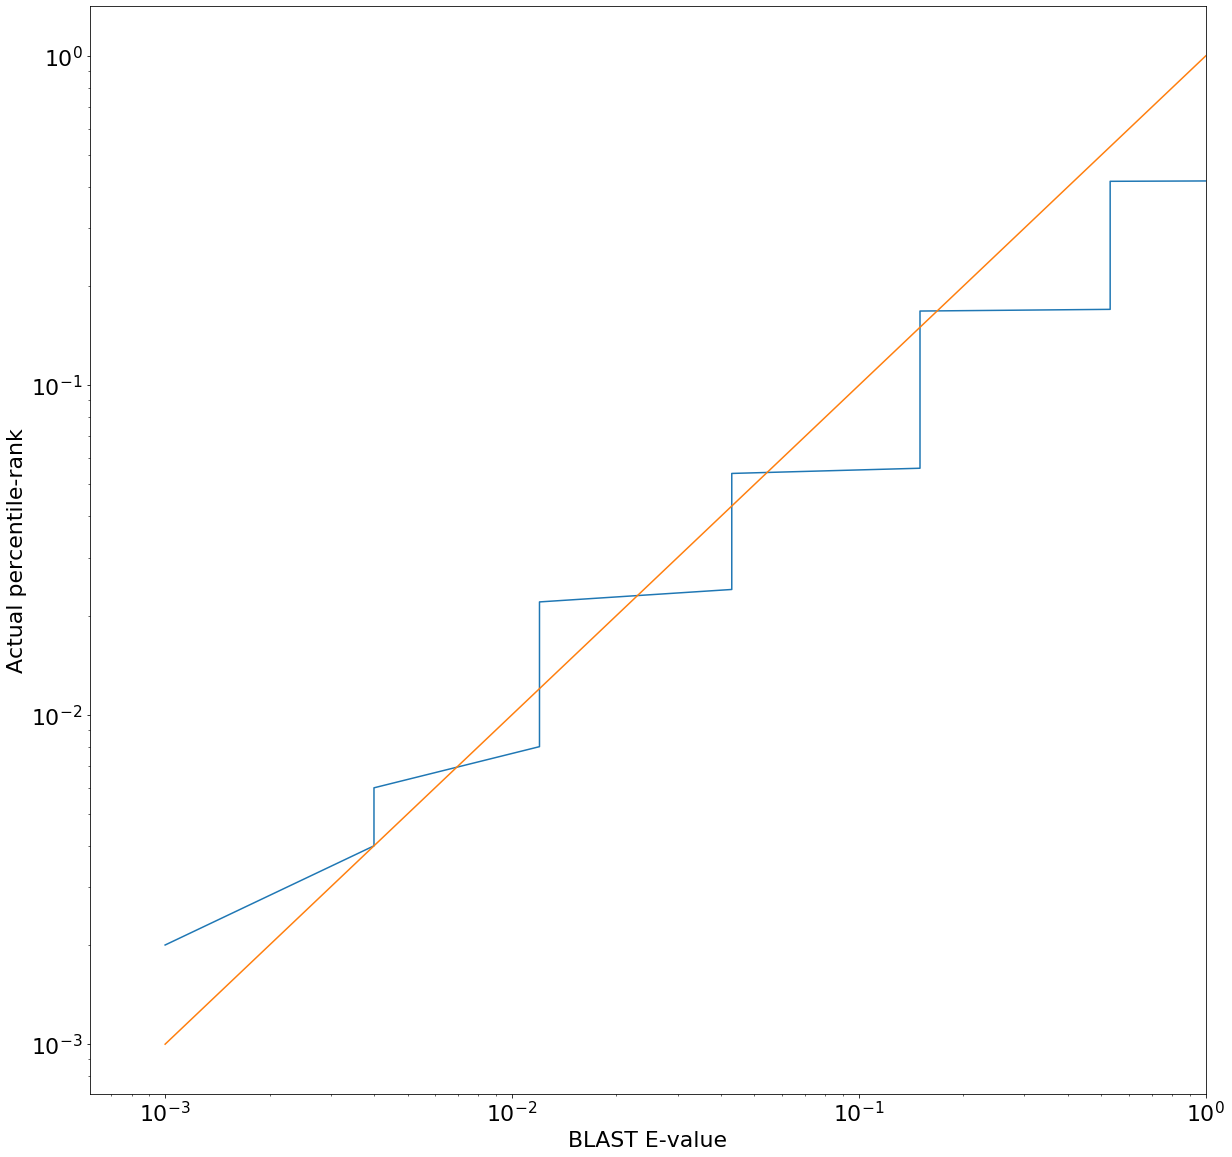

In [23]:
results.sort()
evals = [t[0] for t in results]
n = len(results)
ranks = [float(i + 1) / n for i in range(n)]

from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams["figure.figsize"] = 20, 20
pyplot.rcParams.update({'font.size': 22}) # increase font size to be readable!
pyplot.loglog(evals, ranks)
pyplot.loglog((0.001, 1), (0.001,1)) # draw diagonal y=x line
pyplot.xlabel('BLAST E-value')
pyplot.ylabel('Actual percentile-rank')
pyplot.xlim(xmax=1)

### Creating your own estimator of the E-value

BLAST refers to its alignment scores as "bitscores"; they are just the standard log-odds score that we've discussed in class.  One consequence of this log-odds scoring is that there should be a linear relationship between the bitscore and the log of the p-value (and hence also of the e-value, after applying the Bonferroni correction).  We can visualize this linear relationship by graphing the bitscore vs. the empirical p-value on a log-scale.

Extract the BLAST bit-scores from the sorted ``scores`` list,
and use ``pyplot.semilogy(bitscores, ranks)`` to plot
them vs. the percentile-ranks (with only the latter on a log
scale).  

**QUESTION**: Extrapolate your observed plot out to the bit-score
observed for your original query sequence (i.e. 55): what would its
p-value (percentile rank) be?  How does that compare with
BLAST's reported e-value for your original sequence?

**ANSWER**: The p-value for the original query sequence 55 looks like it would be somewhere around 1e-7, extrapolating the current trend. This is about 1e-2 off with BLAST's reported e-value for the original sequence, 1e-9.

(1e-11, 1.3644213303214185)

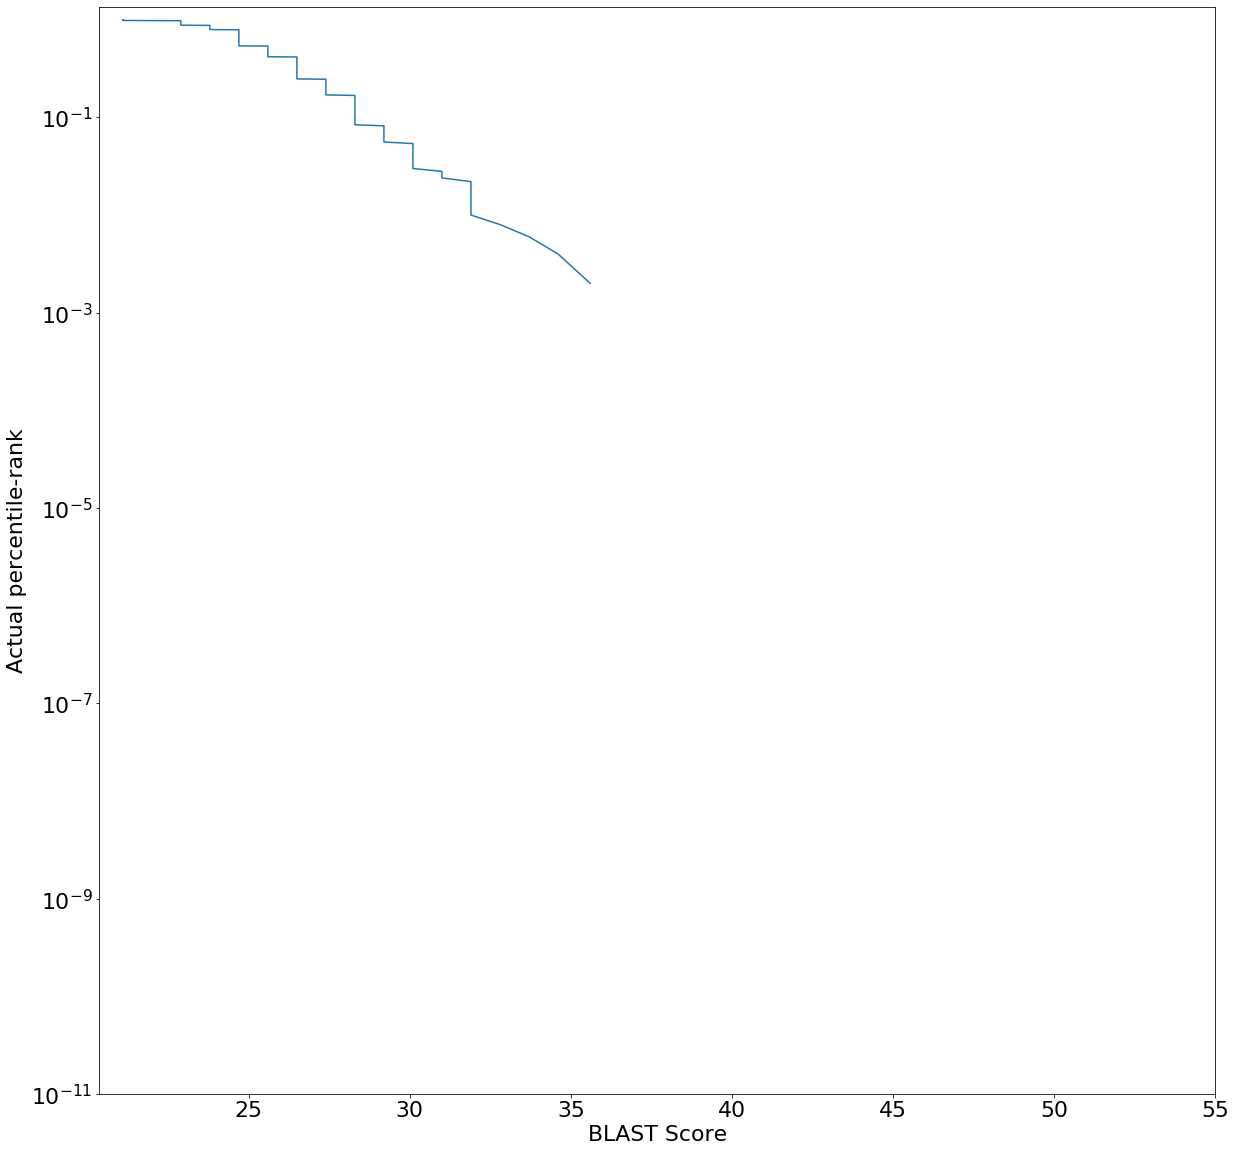

In [25]:
bitscores = [t[1] for t in results]
bitscores.sort(reverse=True) # biggest bitscore corresponds to smallest rank
pyplot.semilogy(bitscores, ranks) # plot Y on log-scale
pyplot.xlabel('BLAST Score')
pyplot.ylabel('Actual percentile-rank')
pyplot.xlim(xmax=55) # extend x-axis to a bitscore of 55
pyplot.ylim(ymin=1e-11) # extend y-axis down to p-value of 1e-11